## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read Dataset 

In [2]:
data=pd.read_csv(r'C:\Users\619pa\Desktop\avalanche prediction\Avalanche.csv')
data.head()

,Slope,Forest Density,Snow Density,Air Temperature,Wind,Prediction
0,59,H,52,-17,19,2
1,24,L,23,-8,19,0
2,15,H,30,7,19,0
3,27,L,61,-13,25,1
4,34,H,4,-20,7,0


## Data Pre-Processing

In [3]:
data.isnull().any()

Slope              False
Forest Density     False
Snow Density       False
Air Temperature    False
Wind               False
Prediction         False
dtype: bool

In [4]:
x=data.iloc[:,0:5].values
y=data.iloc[:,5:6].values
x[0]

array([59, 'H', 52, -17, 19], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [6]:
le=LabelEncoder()

In [7]:
x[:,1]=le.fit_transform(x[:,1])
x[0]

array([59, 0, 52, -17, 19], dtype=object)

In [8]:
oh=OneHotEncoder(categorical_features=[1])

In [9]:
x=oh.fit_transform(x).toarray()

In [10]:
x

array([[  1.,   0.,   0., ...,  52., -17.,  19.],
       [  0.,   1.,   0., ...,  23.,  -8.,  19.],
       [  1.,   0.,   0., ...,  30.,   7.,  19.],
       ...,
       [  0.,   0.,   1., ...,  33.,  13.,  35.],
       [  0.,   1.,   0., ...,  51.,  -4.,  35.],
       [  0.,   0.,   1., ...,  59., -29.,   8.]])

In [11]:
x=x[:,1:]

In [12]:
data1=pd.DataFrame(x,columns=['FD0','FD1','Slope','Snow Density','Temperature','Wind'])

In [13]:
data2=pd.DataFrame(y,columns=['p'])

In [14]:
data1['p']=data2['p']

In [15]:
import seaborn as sns

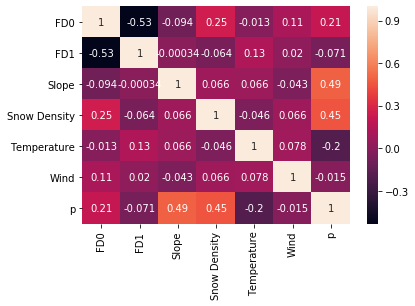

In [16]:
sns.heatmap(data1.corr(),annot=True)

## Split Dataset for Test and Train

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Apply DecisionTree Algorithm 

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
pred=dt.predict(x_test)

## Calculate Accuracy 

In [21]:
from sklearn.metrics import accuracy_score,roc_curve,auc,confusion_matrix,classification_report

In [22]:
accuracy_score(y_test,pred)

0.8292682926829268

In [23]:
x_test[0:10]

array([[  0.,   0.,  34.,   2., -23.,  33.],
       [  1.,   0.,  34.,  73., -34.,  13.],
       [  1.,   0.,  75.,  70., -11.,  36.],
       [  0.,   1.,  44.,   6., -21.,  34.],
       [  0.,   0.,  55.,  24., -16.,  16.],
       [  0.,   0.,  26.,  12.,  -8.,  17.],
       [  1.,   0.,  34.,  51.,  -4.,  35.],
       [  1.,   0.,  33.,  53.,  -7.,  24.],
       [  0.,   1.,  34.,  33.,  13.,  35.],
       [  0.,   1.,  76.,  52.,  11.,  11.]])

In [24]:
y=dt.predict([[0,0,0,0,0,0]])

In [25]:
len(pred)

41

In [26]:
y_test_new=np.resize(y_test,41)
y_test_new

array([2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 0, 2, 1,
       1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1],
      dtype=int64)

In [27]:
c_mat=pd.DataFrame(confusion_matrix(y_test_new,pred),columns=['Class 0 predicted','Class 1 predicted','Class 2 predicted'],
                   index=['Class 0 Actual','Class 1 Actual','Class 2 Actual'])

In [28]:
print(classification_report(y_test_new,pred))

             precision    recall  f1-score   support

          0       0.69      0.90      0.78        10
          1       0.94      0.75      0.83        20
          2       0.83      0.91      0.87        11

avg / total       0.85      0.83      0.83        41



In [29]:
print(c_mat)

                Class 0 predicted  Class 1 predicted  Class 2 predicted
Class 0 Actual                  9                  0                  1
Class 1 Actual                  4                 15                  1
Class 2 Actual                  0                  1                 10
